# Co-activation analysis
In this analysis, I contrast the co-activation patterns between sets of related regions. That is, we seek to find voxels throught the brain that co-activate to a greater extent with one cluster than others

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("data/neurosynth_60_0.4.pkl")

The following two functions are all that is necessary to perform this analysis:

`coactivation_contrast` peforms the analysis and returns an image for each region in the analysis. For each region, voxels in the image are those that co-activated to a greater extent with that region, than other regions in the analysis.

`make_thresholded_slices` takes a list of images and overlays them using nilearn's plot_roi

In [3]:
from coactivation import coactivation_contrast
from plotting import make_thresholded_slices

In [4]:
cut_coords = np.arange(-15, 60, 12) # I use the same z coordinates for each axial plot

## k = 3 co-activation contrast

/home/zorro/repos/neurosynth/neurosynth/analysis/meta.py:135: RuntimeWarning: invalid value encountered in true_divide
  pFgA = pAgF * pF / pA
/home/zorro/repos/neurosynth/neurosynth/analysis/meta.py:140: RuntimeWarning: invalid value encountered in true_divide
  pFgA_prior = pAgF * prior / pAgF_prior
/home/zorro/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


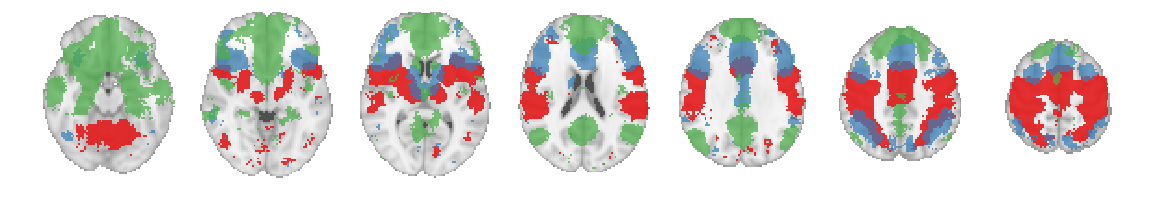

In [22]:
contrast_mas = coactivation_contrast(
    dataset, 'images/cluster_labels_k3.nii.gz', q = 0.001)
make_thresholded_slices(contrast_mas, sns.color_palette('Set1', 3), 
                       cut_coords=cut_coords, annotate=False)

In [20]:
dataset = Dataset('data/database.txt')

/home/zorro/repos/neurosynth/neurosynth/base/dataset.py:178: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  xyz[inds] = self.transformer.apply(s, xyz[inds])


In [21]:
dataset.add_features('data/features.txt')

In [25]:
dataset.save('data/neurosynth_60_0.4.pkl')

## k = 9 co-activation contrast

In this analysis, I contrast sets of regions in the k = 9 clustering solution, grouped by their membership in a larger regions in k = 3

In [4]:
# Here I define the groupings
posterior = [3, 6]
middle = [1, 5, 7, 9]
anterior = [2, 4, 8]

/Users/aleph4/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


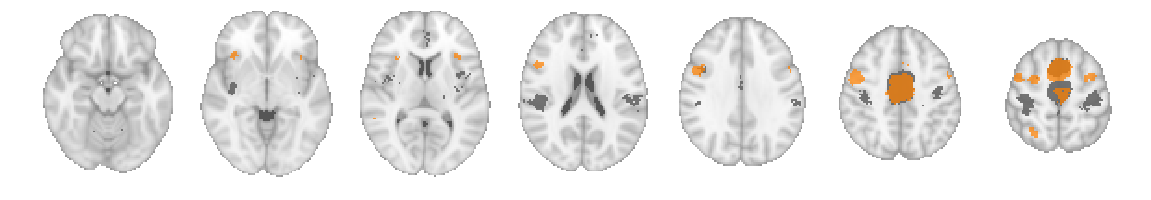

In [8]:
from plotting import nine_colors
contrast_mas = coactivation_contrast(
    dataset, 'images/cluster_labels_k9.nii.gz', posterior)
colors = list(reversed([c for i, c in enumerate(nine_colors) if i + 1 in posterior]))
make_thresholded_slices(list(reversed(contrast_mas)), colors, 
                       cut_coords=cut_coords, annotate=False)

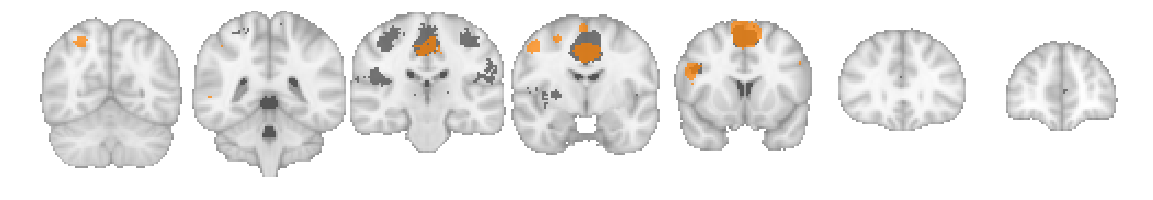

In [9]:
make_thresholded_slices(list(reversed(contrast_mas)), colors, 
                       cut_coords=range(-60, 50, 18), display_mode='y', annotate=False)

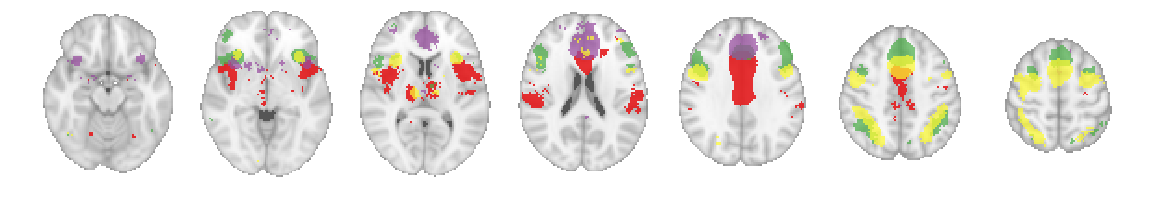

In [10]:
contrast_mas = coactivation_contrast(
    dataset, 'images/cluster_labels_k9.nii.gz', middle)
colors = [c for i, c in enumerate(nine_colors) if i + 1 in middle]
make_thresholded_slices(contrast_mas, colors, 
                       cut_coords=cut_coords, annotate=False)

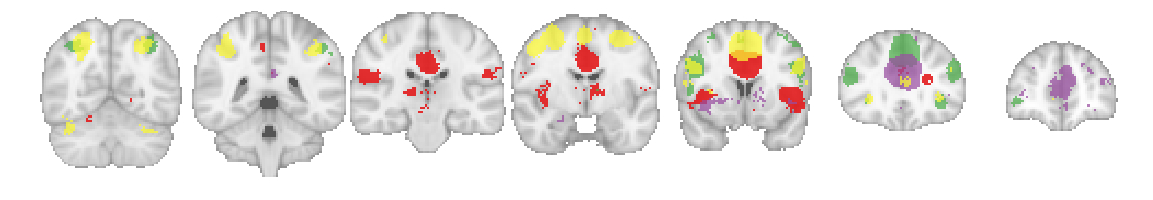

In [11]:
make_thresholded_slices(contrast_mas, colors, cut_coords=range(-60, 50, 18), display_mode='y', annotate=False)

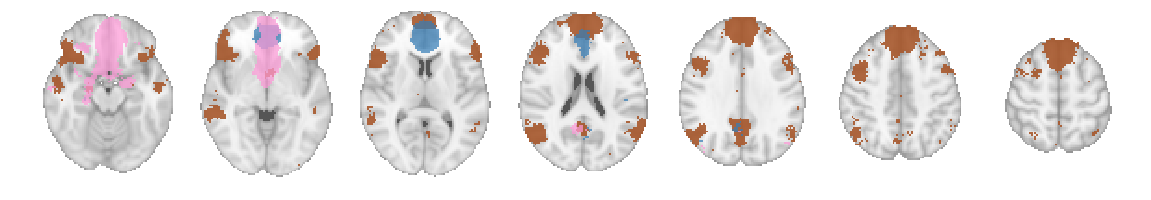

In [12]:
contrast_mas = coactivation_contrast(
    dataset, 'images/cluster_labels_k9.nii.gz', anterior)
colors = [c for i, c in enumerate(nine_colors) if i + 1 in anterior]
make_thresholded_slices(contrast_mas, colors, 
                       cut_coords=cut_coords, annotate=False)

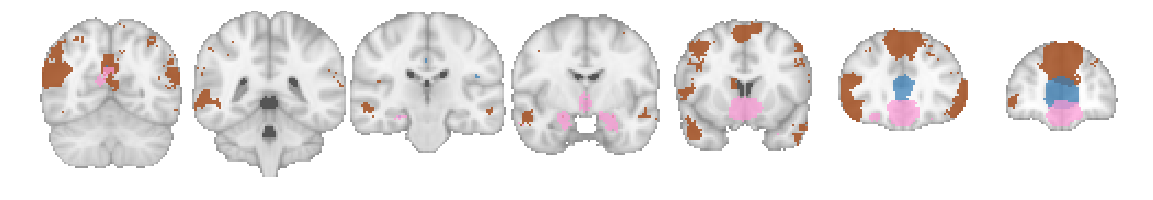

In [13]:
make_thresholded_slices(contrast_mas, colors, cut_coords=range(-60, 50, 18), 
                        display_mode='y', annotate=False)